# Case Study 2: How Can a Wellness Technology Company Play It Smart?

## Scenario
Bellabeat is a small high-tech manufacturer of health-focused products for women. They have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. The marketing analytics team has been asked to focus on one of Bellabeat's products and analyze smart device data to gain insights into how consumers are using their smart devices. It can help guide marketing strategy for the company. 

## Ask
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

### Deliverables:
1. A clear summary of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of analysis
5. Supporting visualizations and key fiindings
6. Top high-level content recommendations based on analysis

### Stakeholders:
 * Urška Sršen - Bellabeat's cofounder and Chieef Creative Officer;
 * Sandrio Mur - Mathematician and Bellabeat's cofounder, key member of the Bellabeat executive team.

## Prepare

### Dataset description

I'm going to use public data that explores smart device users' daily habits from *Kaggle.com*: https://www.kaggle.com/datasets/arashnic/fitbit. This dataset made available through Mobius - Data Scientist from Australia (https://www.kaggle.com/arashnic). This Kaggle data set contains personal fitness tracker from thirty fitbit users. These users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users' habits.

This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 04.12.2016-05.12.2016 and has lincense CC0: Public Domain, so we can say that the data is reliable and original. 
But we have some limitations here: the datasets only contains data during 1 month (12 April 2016 - 12 May 2016), only 30 days from Spring season, so it can create a sample bias. Also this data isn't current, because it's quite old (more than 6 years old). 

### Data organization

Our data is stored in 18 csv files: dailyActivity_merged, dailyCalories_merged, dailyIntensities_merged, dailySteps_merged, heartrate_seconds_merged, hourlyCalories_merged, hourlyIntensities_merged, hourlySteps_merged, minuteCaloriesNarrow_merged, minuteCaloriesWide_merged, minuteIntensitiesNarrow_merged, minuteIntensitiesWide_merged, minuteMETsNarrow_merged, minuteSleep_merged, minuteStepsNarrow_merged, minuteStepsWide_merged, sleepDay_merged, weightLogInfo_merged.
Let's download them and save into separate directory `Fitabase Data 4.12.16-5.12.16/CSV/`. 
As we can see from file's names: data organized in both ways: long and wide formats. Different files also have different data frequency: daily, hourly, minute.


## Process

At first, I will use **Excel** to clean the data. Let's open *CSV* files and save them to *XLSX*. Then I'll use *Text to Columns* button to convert strings with commas as delimeter into columns (It's important to choose appropriate format for every column, e.g. `date` for `ActivityDate` column for `dailyActivity_merged` file or chose right delimeter for decimal columns). So we'll get following files:

* dailyActivity_merged.xlsx - daily total activity parameters for every user (`id`): steps, distance, intensities, calories.
* hourlySteps_merged.xlsx - hourly steps count. After converting text to columns I had some issue with datetime column `ActivityHour` - date wasn't converted appropriate. So I used folrmulas to create a new column `ActivityHour_new` with correct values and formats. After that I changed formulas for values and deleted old column.
* hourlyCalories_merged.xlsx - hourly calories loss. Added a new column `ActivityHour_new`.
* hourlyIntensities_merged.xlsx - total and avargae hourly intensites. Added a new column `ActivityHour_new`.
* heartrate_seconds_merged.xlsx - heartrate measurement by seconds. Added a new column `Time_new`. CSV file is to large to fit into XLSX file.
* minuteMETsNarrow_merged.xlsx - The metabolic equivalent for task per minute. Added a new column `ActivityMinute_new`. CSV file is to large to fit into XLSX file. 
* sleepDay_merged.xlsx - information about sleep for every day. Added a new column `SleepDay_new`.
* weightLogInfo_merged.xlsx - weight measurement data. Added a new column `Date_new`


Formula for convertion datetime into correct format: 
`=IF(ISNUMBER(B2); DATE(YEAR(B2); DAY(B2); MONTH(B2)) + TIME(HOUR(B2); MINUTE(B2); SECOND(B2)); DATE(MID(B2;6;4); LEFT(B2); MID(B2;3;2)) + TIMEVALUE(RIGHT(B2;11)))`

I also used *Remove Duplicates* button to check data for duplicates: 3 duplicated rows were founded and removed from *sleepDay_merged.xlsx*. 
Besides fixing issues with datetime formats, I checked numbers for its formats: using correct delimeter, appropriate number of decimals.

Then I'll use **Python** to export data to datafarme. I'll export only 8 selected files to analyze them. Let's import `pandas` and read csv files into Pandas dataframes. 

In [89]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [2]:
#read csv into dataframe
total_activity_daily = pd.read_csv('dailyActivity_merged.csv')
#show first 5 rows
total_activity_daily.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [3]:
#read other csv files into dataframe
steps_hourly = pd.read_csv('hourlySteps_merged.csv')
calories_hourly = pd.read_csv('hourlyCalories_merged.csv')
intensities_hourly = pd.read_csv('hourlyIntensities_merged.csv')
heartrate_seconds = pd.read_csv('heartrate_seconds_merged.csv')
METs_minute = pd.read_csv('minuteMETsNarrow_merged.csv')
sleep_daily = pd.read_csv('sleepDay_merged.csv')
weight_log_info = pd.read_csv('weightLogInfo_merged.csv')

Let's explore the main dataframe `total_activity_daily`, its fields, data types and its values. At first, show dataframe info: we have 940 rows in total, 15 columns, none of columns contains `NULL` values.

In [4]:
#show columns formats
total_activity_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

We can notice that `ActivityDate` has `object` format, so we should convert it to date.

In [5]:
#convert ActivityDate to datetime format
total_activity_daily['ActivityDate'] = pd.to_datetime(total_activity_daily['ActivityDate'])
total_activity_daily['ActivityDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 940 entries, 0 to 939
Series name: ActivityDate
Non-Null Count  Dtype         
--------------  -----         
940 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.5 KB


In [6]:
#find number of unique customers 
len(total_activity_daily.drop_duplicates(['Id'])['Id'])

33

In [7]:
print(len(list(total_activity_daily.drop_duplicates(['ActivityDate'])['ActivityDate'])))

31


In [8]:
print(total_activity_daily['TotalSteps'].min(), total_activity_daily['TotalSteps'].max(), '\n', 
      total_activity_daily['TotalDistance'].min(), total_activity_daily['TotalDistance'].max(), '\n', 
      total_activity_daily['TrackerDistance'].min(), total_activity_daily['TrackerDistance'].max(), '\n', 
      total_activity_daily['LoggedActivitiesDistance'].min(), total_activity_daily['LoggedActivitiesDistance'].max(), '\n', 
      total_activity_daily['VeryActiveDistance'].min(), total_activity_daily['VeryActiveDistance'].max(), '\n', 
      total_activity_daily['ModeratelyActiveDistance'].min(), total_activity_daily['ModeratelyActiveDistance'].max(), '\n', 
      total_activity_daily['LightActiveDistance'].min(), total_activity_daily['LightActiveDistance'].max(), '\n', 
      total_activity_daily['SedentaryActiveDistance'].min(), total_activity_daily['SedentaryActiveDistance'].max(), '\n', 
      total_activity_daily['VeryActiveMinutes'].min(), total_activity_daily['VeryActiveMinutes'].max(), '\n', 
      total_activity_daily['FairlyActiveMinutes'].min(), total_activity_daily['FairlyActiveMinutes'].max(), '\n', 
      total_activity_daily['LightlyActiveMinutes'].min(), total_activity_daily['LightlyActiveMinutes'].max(), '\n', 
      total_activity_daily['SedentaryMinutes'].min(), total_activity_daily['SedentaryMinutes'].max(), '\n', 
      total_activity_daily['Calories'].min(), total_activity_daily['Calories'].max())

0 36019 
 0.0 28.0300006866455 
 0.0 28.0300006866455 
 0.0 4.94214200973511 
 0.0 21.9200000762939 
 0.0 6.48000001907349 
 0.0 10.710000038147 
 0.0 0.109999999403954 
 0 210 
 0 143 
 0 518 
 0 1440 
 0 4900


that contains following fields:

`Id` - unique customer identitier (33 customers in dataset), `integer` <br>
`ActivityDate` - Date of the activity (30 dates, period 12.04.2016 - 12.05.2016), `datetime` <br>
`TotalSteps` - total daily number of steps (0 - 36019), `integer` <br>
`TotalDistance` - total daily distance in km (0 - 28.03), `float` <br>
`TrackerDistance` - daily kilometers tracked by Fitbit device (0 - 28.03), `float` <br>
`LoggedActivitiesDistance` - total daily kilometers from logged activities (0 - 4.94), `float` <br>
`VeryActiveDistance` - total daily kilometers for very active activity (0 - 21.92), `float` <br>
`ModeratelyActiveDistance` - total daily kilometers for moderate active activity (0 - 6.48), `float` <br>
`LightActiveDistance` - total daily kilometers for light active activity (0 - 10.71), `float` <br>
`SedentaryActiveDistance` - total daily kilometers for sedentary active activity (0 - 0.11), `float` <br>
`VeryActiveMinutes` - total daily minutes for very active activity (0 - 210), `integer` <br>
`FairlyActiveMinutes` - total daily minutes for moderate active activity (0 - 143), `integer` <br>
`LightlyActiveMinutes` - total daily minutes for light active activity (0 - 518), `integer` <br>
`SedentaryMinutes` - total daily minutes for sedentary active activity (0 - 1440), `integer` <br>
`Calories` - total kilocalories spended during the day (0 - 4900), `integer`

Also take a look on data with information about heartrate, METs, sleep and weight. Split columns with datetime into two separate columns: date and time and aggregate this data by date into daily values.

## Analyze

Let's start our anlize. At first we should format our data and aggregate it. I am going to create one useful dataset.

In [9]:
#show first values for heartrate dataframe
heartrate_seconds.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [10]:
#convert column Time to datatime format 
heartrate_seconds['Time'] = pd.to_datetime(heartrate_seconds['Time'])
#split it into Date and Time
heartrate_seconds['Date'] = heartrate_seconds['Time'].dt.date
heartrate_seconds['Time'] = heartrate_seconds['Time'].dt.time
#heartrate_seconds.head()

In [11]:
#group data by dates and calculate avg, min and max values
agg_functions = { 
    'Value': 
    ['mean', 'median', 'min', 'max'] 
} 
heartrate_daily = heartrate_seconds.groupby([heartrate_seconds['Date'], heartrate_seconds['Id']]).agg(agg_functions)

In [12]:
#convert column names into one level
heartrate_daily.reset_index(inplace = True)
heartrate_daily.columns = ['_'.join(col) for col in heartrate_daily.columns.values]

#corrcet column names
heartrate_daily.rename(columns = {'Date_' : 'Date', 'Id_' : 'Id'}, inplace = True)
heartrate_daily.rename(columns = {'Value_mean' : 'Heartrate_mean', 'Value_median' : 'Heartrate_median'
                                  , 'Value_min' : 'Heartrate_min', 'Value_max' : 'Heartrate_max'}, inplace = True)

#convert to datetime format
heartrate_daily['Date'] = pd.to_datetime(heartrate_daily['Date'])

#print result
heartrate_daily.head()

,Date,Id,Heartrate_mean,Heartrate_median,Heartrate_min,Heartrate_max
0,2016-04-12,2022484408,75.804177,72.0,52,134
1,2016-04-12,2347167796,86.082334,82.0,57,172
2,2016-04-12,4020332650,83.499014,87.0,49,133
3,2016-04-12,4558609924,76.639377,76.0,57,104
4,2016-04-12,5553957443,64.365114,62.0,50,106


In [13]:
#show first values for METs dataframe
METs_minute.head()

,Id,ActivityMinute,METs
0,1503960366,4/12/2016 12:00:00 AM,10
1,1503960366,4/12/2016 12:01:00 AM,10
2,1503960366,4/12/2016 12:02:00 AM,10
3,1503960366,4/12/2016 12:03:00 AM,10
4,1503960366,4/12/2016 12:04:00 AM,10


In [14]:
#convert column ActivityMinute to datatime format 
METs_minute['ActivityMinute'] = pd.to_datetime(METs_minute['ActivityMinute'])
#split it into Date and Time
METs_minute['ActivityDate'] = METs_minute['ActivityMinute'].dt.date
METs_minute['ActivityMinute'] = METs_minute['ActivityMinute'].dt.time
#METs_minute.head()

In [15]:
#group data by dates and calculate avg, min and max values
agg_functions = { 
    'METs': 
    ['mean', 'median', 'min', 'max'] 
} 
METs_daily = METs_minute.groupby([METs_minute['ActivityDate'], METs_minute['Id']]).agg(agg_functions)

#convert column names into one level
METs_daily.reset_index(inplace = True)
METs_daily.columns = ['_'.join(col) for col in METs_daily.columns.values]

#corrcet column names
METs_daily.rename(columns = {'ActivityDate_' : 'Date', 'Id_' : 'Id'}, inplace = True)

#convert to datetime format
METs_daily['Date'] = pd.to_datetime(METs_daily['Date'])

#print result
METs_daily.head()

,Date,Id,METs_mean,METs_median,METs_min,METs_max
0,2016-04-12,1503960366,17.528472,12.0,10,99
1,2016-04-12,1624580081,11.968056,10.0,10,72
2,2016-04-12,1644430081,15.811111,10.0,10,76
3,2016-04-12,1844505072,15.072222,12.0,10,66
4,2016-04-12,1927972279,10.832639,10.0,10,32


In [16]:
#show first values for sleep dataframe
sleep_daily.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [17]:
#delete duplicates
sleep_daily = sleep_daily.drop_duplicates()

#convert column SleepDay to datatime format 
sleep_daily['SleepDay'] = pd.to_datetime(sleep_daily['SleepDay'])
#sleep_daily.head()

In [18]:
#show first values for weight dataframe
weight_log_info.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [19]:
#convert column ActivityMinute to datatime format 
weight_log_info['Date'] = pd.to_datetime(weight_log_info['Date'])
#split it into Date and Time
weight_log_info['Time'] = weight_log_info['Date'].dt.time
weight_log_info['Date'] = weight_log_info['Date'].dt.date
#weight_log_info.head()

In [20]:
#group data by dates and calculate avg values
agg_functions = { 
    'WeightKg': ['mean'],
    'BMI': ['mean']
} 
weight_daily = weight_log_info.groupby([weight_log_info['Date'], weight_log_info['Id']]).agg(agg_functions)

#convert column names into one level
weight_daily.reset_index(inplace = True)
weight_daily.columns = ['_'.join(col) for col in weight_daily.columns.values]

#corrcet column names
weight_daily.rename(columns = {'Date_' : 'Date', 'Id_' : 'Id'}, inplace = True)

#convert to datetime format
weight_daily['Date'] = pd.to_datetime(pd.to_datetime(weight_daily['Date']).dt.date)

#print result
weight_daily.head()

,Date,Id,WeightKg_mean,BMI_mean
0,2016-04-12,6962181067,62.500000,24.389999
1,2016-04-12,8877689391,85.800003,25.680000
2,2016-04-13,1927972279,133.500000,47.540001
3,2016-04-13,6962181067,62.099998,24.240000
4,2016-04-13,8877689391,84.900002,25.410000


Let's join all the datasets into one by Date and Id customer.

In [21]:
#merge heartrate_daily
total_activity = pd.merge(total_activity_daily, heartrate_daily, left_on = ['Id', 'ActivityDate'], right_on = ['Id', 'Date'], how = 'left')
#merge MEts_daily
total_activity = pd.merge(total_activity, METs_daily, left_on = ['Id', 'ActivityDate'], right_on = ['Id', 'Date'], how = 'left')
#merge sleep_daily
total_activity = pd.merge(total_activity, sleep_daily, left_on = ['Id', 'ActivityDate'], right_on = ['Id', 'SleepDay'], how = 'left')
#merge weight_daily
total_activity = pd.merge(total_activity, weight_daily, left_on = ['Id', 'ActivityDate'], right_on = ['Id', 'Date'], how = 'left')

In [22]:
total_activity = total_activity.drop(['Date_x', 'Date_y', 'SleepDay', 'Date'], axis=1)

In [23]:
total_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 939
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [42]:
total_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,Heartrate_max,METs_mean,METs_median,METs_min,METs_max,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeightKg_mean,BMI_mean
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,NaN,17.528472,12.0,10.0,99.0,1.0,327.0,346.0,NaN,NaN
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,NaN,15.874306,10.0,10.0,111.0,2.0,384.0,407.0,NaN,NaN
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,NaN,15.686806,12.0,10.0,97.0,NaN,NaN,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,NaN,15.409722,10.0,10.0,97.0,1.0,412.0,442.0,NaN,NaN
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,NaN,16.454167,10.0,10.0,103.0,2.0,340.0,367.0,NaN,NaN


In [223]:
#statistical information for all columns
total_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,...,Heartrate_max,METs_mean,METs_median,METs_min,METs_max,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeightKg_mean,BMI_mean
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,...,334.000000,934.000000,934.000000,934.000000,934.000000,410.000000,410.000000,410.000000,67.000000,67.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,...,138.703593,14.663956,10.260171,9.931478,73.595289,1.119512,419.173171,458.482927,72.035821,25.185224
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,...,21.687215,2.903261,0.576215,0.809651,29.970493,0.346636,118.635918,127.455140,13.923206,3.066963
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,80.000000,10.000000,10.000000,0.000000,10.000000,1.000000,58.000000,61.000000,52.599998,21.450001
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,...,125.000000,12.710243,10.000000,10.000000,58.000000,1.000000,361.000000,403.750000,61.400002,23.959999
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,...,135.500000,14.696181,10.000000,10.000000,74.000000,1.000000,432.500000,463.000000,62.500000,24.389999
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,...,153.000000,16.406771,10.000000,10.000000,93.000000,1.000000,490.000000,526.000000,85.049999,25.559999
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,...,203.000000,25.775694,13.000000,10.000000,157.000000,3.000000,796.000000,961.000000,133.500000,47.540001


Now we have one dataframe with 940 rows, but for heartrate, sleep data and weight information we have much less rows. We have following groups of information:
 - Steps
 - Distance (Total and grouped by activity level)
 - Minutes (Grouped by activity level)
 - Calories
 - Heartrate (Average)
 - METs (Average)
 - Sleep
 - Weight (Kg and BMI)


In [64]:
print("Heartrate customers count:")
print(len(total_activity[~total_activity['Heartrate_mean'].isnull()]['Id'].drop_duplicates()))

print("Heartrate dates count:")
print(len(total_activity[~total_activity['Heartrate_mean'].isnull()]['ActivityDate'].drop_duplicates()))

Heartrate customers count:
14
Heartrate dates count:
31


So, only 14 customers measured their heartrate during the peroiod.

In [66]:
print("Sleep records customers count:")
print(len(total_activity[~total_activity['TotalSleepRecords'].isnull()]['Id'].drop_duplicates()))

print("Sleep records dates count:")
print(len(total_activity[~total_activity['TotalSleepRecords'].isnull()]['ActivityDate'].drop_duplicates()))

Sleep records customers count:
24
Sleep records dates count:
31


Only 24 customers used their devices to record sleep information during the peroiod.

### Let's explore our dataframe and compare different indicators.

Show relationships between steps count and different types of activity minutes.

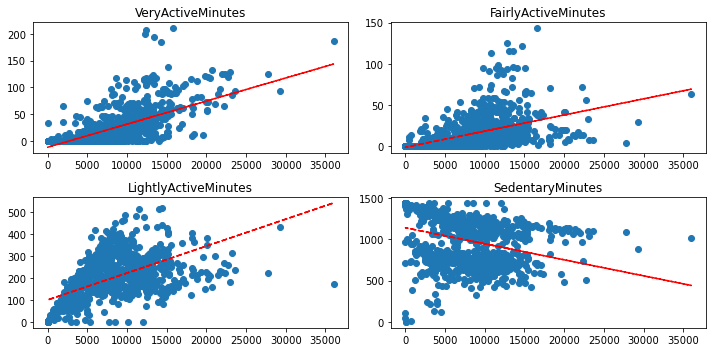

In [172]:
#create scatter plot to show relationships between steps count and activity minutes 
plots = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']
x = np.linspace(0, 10, 100)

#create figure
fig = plt.figure(figsize=(10, 5))

# iterate over the columns list and add a subplot for each column
for num, plot in enumerate(plots, start=1):  
  ax = fig.add_subplot(2, 2, num) # plot with 2 rows and 2 columns
  ax.scatter(total_activity['TotalSteps'], total_activity[plot])
  ax.set_title(plot)
  #add trend
  z = np.polyfit(total_activity['TotalSteps'], total_activity[plot], 1)
  p = np.poly1d(z)
  plt.plot(total_activity['TotalSteps'], p(total_activity['TotalSteps']), "r--")

# add spacing between subplots
fig.tight_layout()

Also we can create a heatmap, that is showing correlation between the indicators.

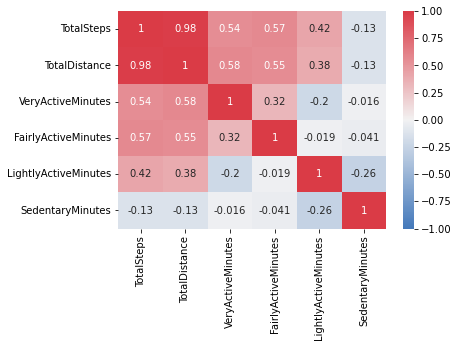

In [169]:
#Show heatmap for correlation between steps/distance and activity minutes
cols = ['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']
data = sleep_activity[cols].corr()
cmap = sns.diverging_palette(250, 10, as_cmap=True)
hm = sns.heatmap(data = data, 
                vmin = -1, 
                vmax = 1,
                annot = True,
                cmap=cmap) 
  
# displaying the plotted heatmap 
plt.show() 

We can see that there are two groups of customers by sedentary minutes in a day: less 1000 minutes and more 1000 minutes. Lets split data into 2 datasets.

In [207]:
#Split customers with less then 1000 sedentary minutes and more.
total_activity_sedentary_low = total_activity[total_activity['SedentaryMinutes'] < 1000]
total_activity_sedentary_high = total_activity[total_activity['SedentaryMinutes'] >= 1000]

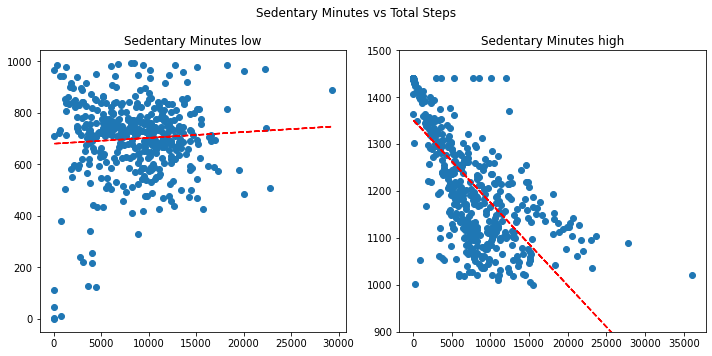

In [232]:
#create figure
fig = plt.figure(figsize=(10, 5))

# iterate over the columns list and add a subplot for each column
ax1 = fig.add_subplot(1, 2, 1) # plot with 1 row and 2 columns
ax1.scatter(total_activity_sedentary_low['TotalSteps'], total_activity_sedentary_low['SedentaryMinutes'])
ax1.set_title('Sedentary Minutes low')

ax2 = fig.add_subplot(1, 2, 2) # plot with 1 row and 2 columns
ax2.scatter(total_activity_sedentary_high['TotalSteps'], total_activity_sedentary_high['SedentaryMinutes'])
ax2.set_title('Sedentary Minutes high')

#add trends
z1 = np.polyfit(total_activity_sedentary_low['TotalSteps'], total_activity_sedentary_low['SedentaryMinutes'], 1)
p1 = np.poly1d(z1)
ax1.plot(total_activity_sedentary_low['TotalSteps'], p1(total_activity_sedentary_low['TotalSteps']), "r--")

z2 = np.polyfit(total_activity_sedentary_high['TotalSteps'], total_activity_sedentary_high['SedentaryMinutes'], 1)
p2 = np.poly1d(z2)
ax2.plot(total_activity_sedentary_high['TotalSteps'], p2(total_activity_sedentary_high['TotalSteps']), "r--")

#set y axe limits
ax2 = plt.gca()
ax2.set_ylim([900, 1500])

# add spacing between subplots
fig.suptitle("Sedentary Minutes vs Total Steps")
fig.tight_layout()

### Calories

Show relationships between calories loss and different types of activity minutes.

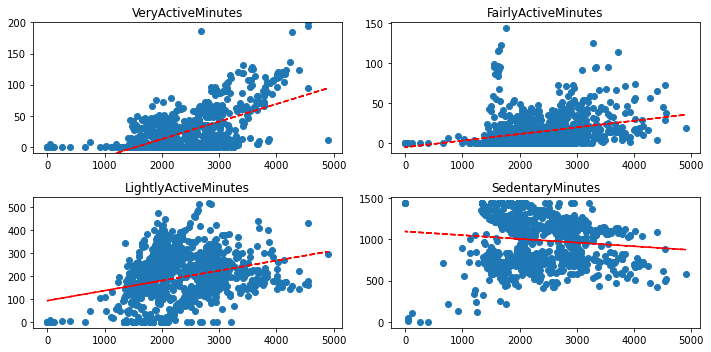

In [234]:
#create scatter plot to show relationships between calories count and activity minutes 
plots = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']
x = np.linspace(0, 10, 100)

fig = plt.figure(figsize=(10, 5))

# iterate over the function list and add a subplot for each function
for num, plot in enumerate(plots, start=1):  
  ax = fig.add_subplot(2, 2, num) # plot with 2 rows and 2 columns
  ax.scatter(total_activity['Calories'], total_activity[plot])
  ax.set_title(plot)
  if num == 1:
    ax.set_ylim([-10, 200])
  z = np.polyfit(total_activity['Calories'], total_activity[plot], 1)
  p = np.poly1d(z)
  plt.plot(total_activity['Calories'], p(total_activity['Calories']), "r--")

# add spacing between subplots
fig.tight_layout()

And with heatmap:

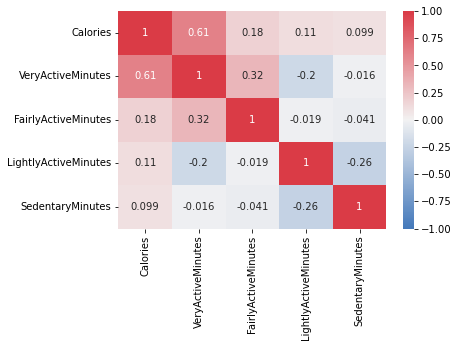

In [170]:
#Show heatmap for correlation between steps/distance and activity minutes
cols = ['Calories', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']
data = sleep_activity[cols].corr()
cmap = sns.diverging_palette(250, 10, as_cmap=True)
hm = sns.heatmap(data = data, 
                vmin = -1, 
                vmax = 1,
                annot = True,
                cmap=cmap) 
  
# displaying the plotted heatmap 
plt.show() 

### METs

Show relationships between activity minutes and METs indicators.

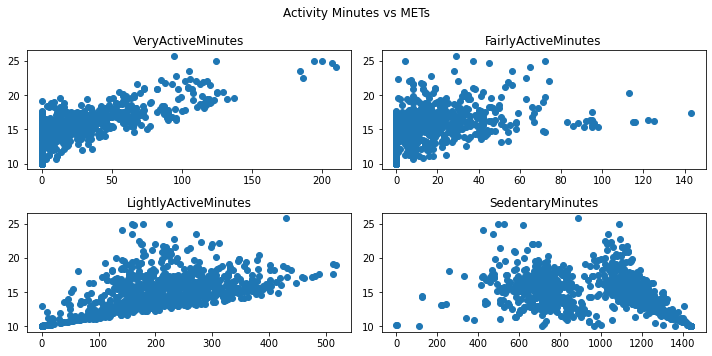

In [235]:
#create scatter plot to show relationships between calories count and activity minutes 
plots = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']
x = np.linspace(0, 10, 100)

fig = plt.figure(figsize=(10, 5))

# iterate over the function list and add a subplot for each function
for num, plot in enumerate(plots, start=1):  
  ax = fig.add_subplot(2, 2, num) # plot with 2 rows and 2 columns
  ax.scatter(total_activity[plot], total_activity['METs_mean'])
  ax.set_title(plot)

# add spacing between subplots
fig.suptitle("Activity Minutes vs METs")
fig.tight_layout()

Show heatmap for correlation between METs and activity minutes:

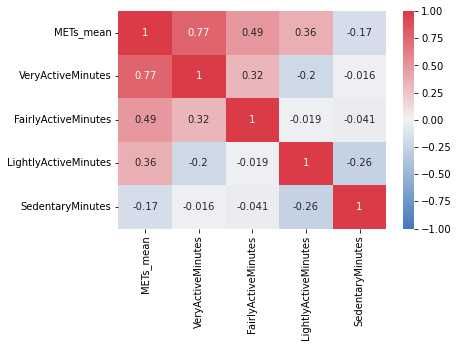

In [171]:
#Show heatmap for correlation between steps/distance and activity minutes
cols = ['METs_mean', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']
data = sleep_activity[cols].corr()
cmap = sns.diverging_palette(250, 10, as_cmap=True)
hm = sns.heatmap(data = data, 
                vmin = -1, 
                vmax = 1,
                annot = True,
                cmap=cmap) 
  
# displaying the plotted heatmap 
plt.show() 

### Sleep data

Let's explore relationships between minutes asleep and time in bed, daily steps.

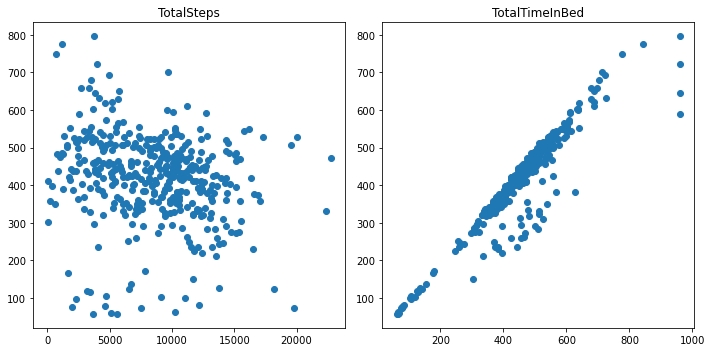

In [216]:
#select only non-null data about sleep activity
sleep_activity = total_activity[~total_activity['TotalMinutesAsleep'].isnull()]

#plt.scatter(sleep_activity['TotalSteps'], sleep_activity['TotalMinutesAsleep']) 
#plt.show()

#create scatter plot to show relationships between calories count and activity minutes 
plots = ['TotalSteps', 'TotalTimeInBed']

fig = plt.figure(figsize=(10, 5))

# iterate over the function list and add a subplot for each function
for num, plot in enumerate(plots, start=1):  
  ax = fig.add_subplot(1, 2, num) # plot with 2 rows and 2 columns
  ax.scatter(sleep_activity[plot], sleep_activity['TotalMinutesAsleep'])
  ax.set_title(plot)

# add spacing between subplots
fig.tight_layout()

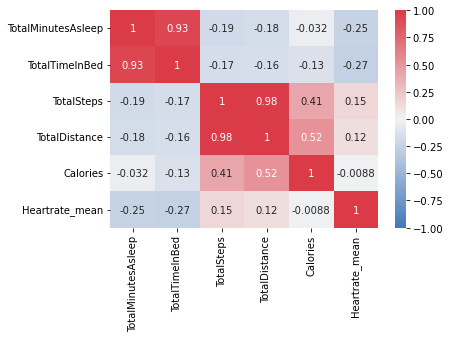

In [219]:
#Show heatmap for correlation between sleep minutes and steps an distance
cols = ['TotalMinutesAsleep', 'TotalTimeInBed', 'TotalSteps', 'TotalDistance', 'Calories', 'Heartrate_mean']
data = sleep_activity[cols].corr()
cmap = sns.diverging_palette(250, 10, as_cmap=True)
hm = sns.heatmap(data = data, 
                vmin = -1, 
                vmax = 1,
                annot = True,
                cmap=cmap) 
  
# displaying the plotted heatmap 
plt.show() 

### Weight and BMI

In [68]:
print("Weight customers count:")
print(len(total_activity[~total_activity['WeightKg_mean'].isnull()]['Id'].drop_duplicates()))

print("Weight dates count:")
print(len(total_activity[~total_activity['WeightKg_mean'].isnull()]['ActivityDate'].drop_duplicates()))

Weight customers count:
8
Weight dates count:
31


Only 8 customers measured their weight during the peroiod. It's the least popular function and we have too little data to analize it.

## Share

### Let's summarize result of our analysis, identify trends and relationships

1) There is inversional relationship between steps taken in a day and sedentary minutes for customers with large number of sedentary minutes (more then 1000 min per day). Using Bellabeat devices can motivate these people to walk more and to reduce their sedentary minutes. For other people counting steps can help them maintain amount of steps in a day. <br>
2) We can see average correlation between very active minutes and calories. So it can help Bellabeat customers (or potential customers) to control their calories during the day and compare it with types of their activities. <br>
3) METs average level during the day has high correlation with very active minutes. This indicator also can help people to control their daily excercises and health status with the help of Bellabeat devices. <br>
4) For most users time in bed and asleep time is the same (the correlation is close to 1). But if these two indicators vary greatly Bellabeat devices can indicate customers about it. Or Bellabeat devices can send report and show advices about sleep time. So using Bellabeat devices can help people to control their sleep and take care about health. 

## Act

We've analyzed smart devices fitness data and found some trends and insights. I think these insights can help guide marketing strategy for the company or give Bellabeat some usefull information in order to make data-driven decisions. <br>

 * One of the most popular function for smart devices is step counter. So Bellabeat devices can encourage customers to make more steps per day if they make few steps (mean steps count is about 7600 per day). Smart devices can calculate average daily steps number every week and indicate user if their goals are not achieved. It'll be also usefull to notify people about too many sedentary minutes and necessety to move.
![alt text](Steps_vs_SedentaryMinutes.png "MinutesSteps")

 * Also Bellabeat could use information abou activity minutes and METs in their devices. Showing daily aggregation information about very active, fairly active and light active minutes, sedentary minutes, sleep time would inform people about their lifestyle and motivate to increase their level activity if it's necessary. Bellabeat also could use METs indicator and its recommended value (for certain age, sex, weight etc.) for showing some recommendations about users' health.
![alt text](ActivityMinutes_vs_METs.png "METsActivity")
 
 * Bellabeat smart devices can also help people to calculate calories that they burnt. I think It's would be usefull to show this information compared to the activity information. Adding ability to add gathering calories to Bellabeat app can also help users control their health more completely. 


In additional I can notice that we didn't have any information about sex of the customers. And Bellabeat produces devices for women, so it would be better to explore data about smart devices using by women in order to get more accurate insights.